<a href="https://colab.research.google.com/github/Neelov12/MAT-421-Computational-Methods-Integrated-into-Python/blob/main/Module_D_1_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module D: 1.1, 1.2, 1.3

## 1.1: Introduction (Linear Independence)

In this section, I will use a python program to demonstrate the concept of Linear Independence, a fundamental theorum in the area of Linear Spaces

An overview of the concept:

**Definition 1.2.5 (Linear Independence)** A list of vectors $u_1$, ... , $u_m$ is linearly independent if none of them can be written as a linear combination of the
others, that is,

$$
∀ i, u_i ∉ span(\{u_j : j ≠ i\}).
$$

A list of vectors is called linearly dependent if it is not linearly independent. (Sourced from textbook)

In other words, A set of vectors $\{v_1, v_2, ... , v_n\}$ in some vector space $V$ is linearly independent if the only solution to the equation

$$
c_1v_1 + c_2v_2 + , .... , c_nv_n = 0
$$

is when all scalars $\{c_1, c_2, ... , c_n\}$ are equivalent to 0.

To demonstrate this concept, suppose we have two set of vectors:

$$
[[1,0], [0,1]]
$$
$$
[[2,3], [4,6]]
$$

The following program will distinguish for each set if it is independent or not.

Imports

In [1]:
import numpy as np

Function for determining linear independence

In [4]:
def check_linear_independence(vectors):
    matrix = np.array(vectors).T  # Transpose to make columns as vectors
    rank = np.linalg.matrix_rank(matrix)
    num_vectors = len(vectors)

    if rank == num_vectors:
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")

# Example 1: Linearly Independent Vectors (2D case)
independent_vectors = [
    [1, 0],
    [0, 1]
]
print("Checking linearly independent vectors:")
check_linear_independence(independent_vectors)
print()

Checking linearly independent vectors:
The vectors are linearly independent.



Determing independence of   $$ [[1,0], [0,1]] $$




In [3]:
# Example 1: Linearly Independent Vectors (2D case)
independent_vectors = [
    [1, 0],
    [0, 1]
]
print("Checking linearly independent vectors:")
check_linear_independence(independent_vectors)
print()

Checking linearly independent vectors:
The vectors are linearly independent.



Determining independence of
$$
[[2,3], [4,6]]
$$

In [5]:
# Example 2: Linearly Dependent Vectors (2D case)
dependent_vectors = [
    [2, 3],
    [4, 6]
]
print("Checking linearly dependent vectors:")
check_linear_independence(dependent_vectors)

Checking linearly dependent vectors:
The vectors are linearly dependent.


Indeed, the first set of vectors $[[1,0], [0,1]]$ are independent because they form a basis in $𝑅^2$

The second set $[[2,3], [4,6]]$ are dependent because the second vector is a multiple of the first

## 1.2: Elements of Linear Algebra (Orthogonality)

In this section, I create a program that demonstrates the concept of orthogonality

First the concept:

**Definition 1.2.11**: A list of vectors ${u_1, . . . , u_m}$ is orthonormal if the $u_i$’s are
pairwise orthogonal and each has norm 1, that is for all $i$ and all $j ≠ i$,
$⟨u_i, u_j⟩ = 0$, and $|u_i|$ = 1.
(Sourced from textbook)

The following program tests the orthogonality of the following product of vectors:

$$
[1,2] ∩ [-2,1]
$$

$$
[1,1] ∩ [2,3]
$$

Function for testing orthogonality

In [6]:
def check_orthogonality(v1, v2):
    dot_product = np.dot(v1, v2)
    if np.isclose(dot_product, 0):
        print(f"The vectors {v1} and {v2} are orthogonal.")
    else:
        print(f"The vectors {v1} and {v2} are not orthogonal.")

Test $
[1,2] ∩ [-2,1]
$:

In [7]:
# Example 1: Orthogonal Vectors
vector_a = [1, 2]
vector_b = [-2, 1]
print("Checking orthogonality for first set of vectors:")
check_orthogonality(vector_a, vector_b)
print()

Checking orthogonality for first set of vectors:
The vectors [1, 2] and [-2, 1] are orthogonal.



Test $
[1,1] ∩ [2,3]
$:

In [8]:
# Example 2: Non-Orthogonal Vectors
vector_c = [1, 1]
vector_d = [2, 3]
print("Checking orthogonality for second set of vectors:")
check_orthogonality(vector_c, vector_d)

Checking orthogonality for second set of vectors:
The vectors [1, 1] and [2, 3] are not orthogonal.


Indeed,


Vectors $[1,2]$ and $[-2,1]$ are orthogonal because their dot product is
1
(
−
2
)
+
2
(
1
)
=
0
1(−2)+2(1)=0.

<bv>

Vectors $[1,1]$ and $[2,3]$ are not orthogonal because their dot product is
1
(
2
)
+
1
(
3
)
=
5
1(2)+1(3)=5.

## 1.3: Linear Regression

In this section I show code that demonstrates the concept of QR Decomposition to create a linear regression projection of some set of data

Overview of the concept:

A common method to solve the linear regression problem
$$min_
{x \in R^m} ||A_x − b||$$

is to perform a number of QR Decompositions where $A = QR$ to determine an orthogonal projection of some set of data


For some example set of data points, the following program solves the linear regression model using QR Decomposition:

Imports

In [9]:
import matplotlib.pyplot as plt

Linear regression function

In [ ]:
def qr_linear_regression(X, y):
    Q, R = np.linalg.qr(X)
    beta = np.linalg.solve(R, Q.T @ y)
    return beta

Plot of linear regression model

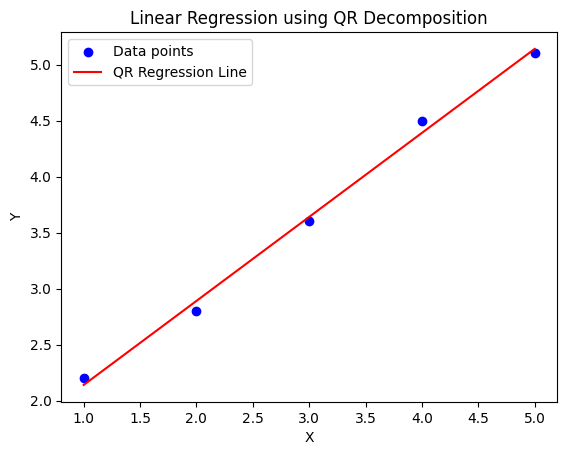

In [11]:
# Example dataset
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.2, 2.8, 3.6, 4.5, 5.1])

# Prepare the design matrix (adding a column of ones for the intercept term)
X = np.column_stack((np.ones_like(x), x))

# Compute regression coefficients using QR decomposition
beta = qr_linear_regression(X, y)

# Generate regression line
x_line = np.linspace(min(x), max(x), 100)
y_line = beta[0] + beta[1] * x_line

# Plot data points and regression line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_line, y_line, color='red', label='QR Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using QR Decomposition')
plt.show()
